In [ ]:
! git clone "https://github.com/gdbwoo/DS-3001-Projects"

Cloning into 'DS-3001-Projects'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 64 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (64/64), 8.04 MiB | 5.49 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
# Import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pipeline tools:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# Variable transformers for cleaning:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
# Analytics:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression

In [ ]:
# Observe all unfiltered data
df = pd.read_csv("/content/DS-3001-Projects/Project 2/fhs_train.csv")
print(df.shape)
print()

(3180, 17)



In [ ]:
# Remove all missing values/na's
df = df.dropna()
print(df.shape)
print(df.dtypes)
print(df.head())

In [ ]:
df_test = pd.read_csv("/content/DS-3001-Projects/Project 2/fhs_test.csv")
df_test = df_test.dropna()

<Axes: xlabel='age', ylabel='Density'>

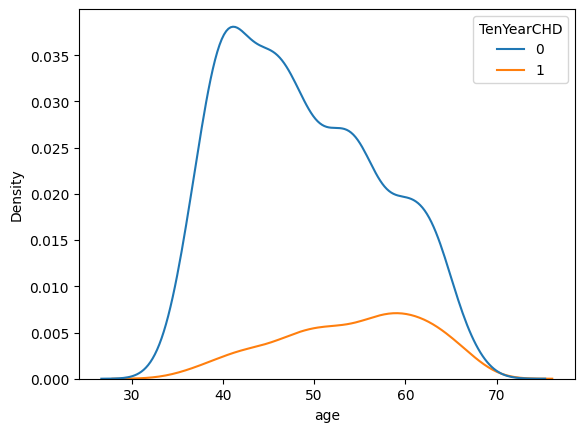

In [ ]:
# Visualize

sns.kdeplot(data=df,x='age',hue='TenYearCHD')

<Axes: xlabel='cigsPerDay', ylabel='Density'>

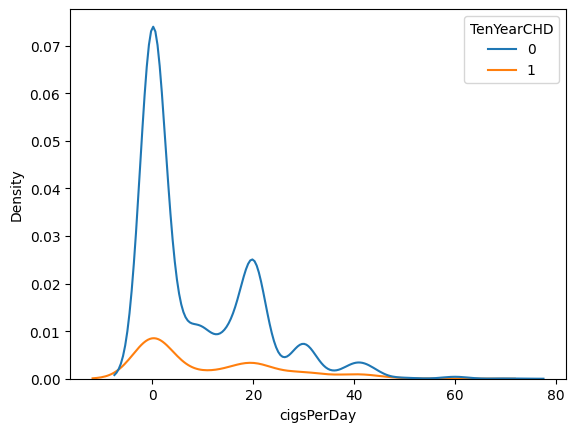

In [ ]:
sns.kdeplot(data=df,x='cigsPerDay',hue='TenYearCHD')

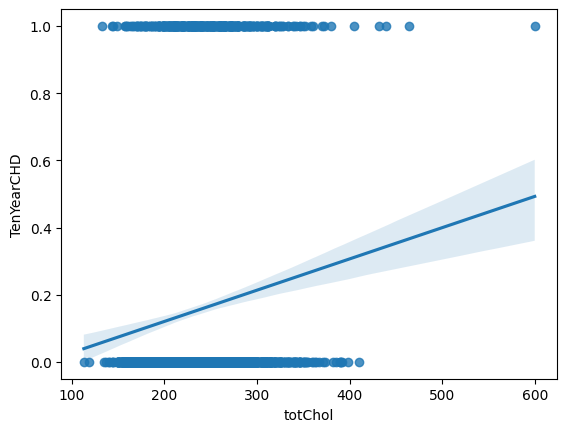

In [ ]:


#sns.scatterplot(data=df,x="sex",y="TenYearCHD")
#sns.scatterplot(data=df,x="age",y="TenYearCHD")
#sns.scatterplot(data=df,x="education",y="TenYearCHD")
#sns.scatterplot(data=df,x="currentSmoker",y="TenYearCHD")
#sns.regplot(data=df,x="cigsPerDay",y="TenYearCHD")
#sns.scatterplot(data=df,x="BPMeds",y="TenYearCHD")
#sns.scatterplot(data=df,x="prevalentStroke",y="TenYearCHD")
#sns.scatterplot(data=df,x="prevalentHyp",y="TenYearCHD")
#sns.scatterplot(data=df,x="diabetes",y="TenYearCHD")
#sns.regplot(data=df,x="totChol",y="TenYearCHD")

plt.show()

In [ ]:
df.columns.unique()

Index(['Unnamed: 0', 'sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:

# 1. Finalize data from Pandas:
y = df['TenYearCHD']
#Z = df.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
#       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
#       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] ]

Z = df.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
X_test = df_test.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] ]
y_test= df_test["TenYearCHD"]
# 2. Set up variable preprocessing:
#cat_vars = ['sex','education','currentSmoker','BPMeds',
#            'prevalentStroke','prevalentHyp','diabetes'] # List of categorical variables
#num_vars = ['age','cigsPerDay', 'totChol','sysBP',
#            'diaBP', 'BMI', 'heartRate', 'glucose'] # List of numeric variables
num_vars = ['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
#cat_pipeline = Pipeline(steps = [('ohc', OneHotEncoder(sparse_output=False))]) # One hot encoding
num_pipeline = Pipeline(steps = [('maxmin', StandardScaler()) # Maxmin scaling
                                 ])

#('imputer', SimpleImputer(strategy='median'))# Imputation for missing values

# 3. Column transformer:
# preprocessor = ColumnTransformer(
#     transformers = [('cat', cat_pipeline, cat_vars), # Transform cat_vars by cat_pipeline
#                     ('num', num_pipeline, num_vars)]) # Transform num_vars by num_pipeline

preprocessor = ColumnTransformer(
     transformers = [ # Transform cat_vars by cat_pipeline
                     ('num', num_pipeline, num_vars)])

# 4. Create model-specific pipelines:
lm_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                ('linreg', LinearRegression(fit_intercept=False))]) # Link preprocessor to model
tree_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                ('tree', DecisionTreeRegressor(max_depth = 6))]) # Link preprocessor to model

# 5. Train-test split:
#X_train, X_test, y_train, y_test = train_test_split(Z, y, # Feature and target variables
#                                                    test_size=.2) # For replication purposes

# 6. Fit the models:
lm = lm_pipe.fit(Z, y)
tree = tree_pipe.fit(Z, y)

print('Linear Model rsq: ', lm.score(Z, y) ) # R-squared
print(lm.named_steps['linreg'].coef_) # Regression coefficients

print('Tree rsq: ', tree.score(Z, y) )

Linear Model rsq:  -0.08086592141487547
[ 0.03289154  0.06024536 -0.0033995  -0.00551334  0.03106246  0.01270034
  0.00823928  0.01009342  0.00856656  0.01475085  0.05457798 -0.01860796
 -0.00257224 -0.00054128  0.02577938]
Tree rsq:  0.22183477874202728


In [ ]:
import statsmodels.api as sm

# Create your model
# X = df.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
#        'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
#        'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
X = df.loc[:,['sex','age','cigsPerDay',"totChol",'sysBP']]
y = df['TenYearCHD']
X = sm.add_constant(X) # Add a constant term if needed
model = sm.OLS(y, X).fit()

# Get the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     54.66
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           2.87e-54
Time:                        03:01:22   Log-Likelihood:                -970.62
No. Observations:                2744   AIC:                             1953.
Df Residuals:                    2738   BIC:                             1989.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6667      0.054    -12.369      0.0

Linear Model rsq:  -0.09396470116428479
[ 0.03289154  0.06024536 -0.0033995  -0.00551334  0.03106246  0.01270034
  0.00823928  0.01009342  0.00856656  0.01475085  0.05457798 -0.01860796
 -0.00257224 -0.00054128  0.02577938]
Tree rsq:  -0.017848120743872764


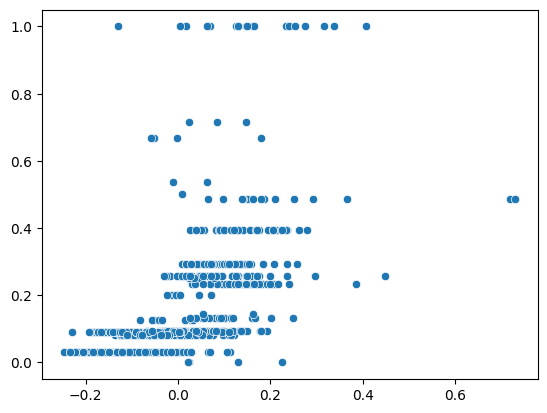

In [ ]:
# 7. Extract results:
print('Linear Model rsq: ', lm.score(X_test, y_test) ) # R-squared
print(lm.named_steps['linreg'].coef_) # Regression coefficients
y_hat_lm = lm.predict(X_test) # Predicted values

print('Tree rsq: ', tree.score(X_test, y_test) ) # R-squared
y_hat_tree = tree.predict(X_test)

sns.scatterplot(x=y_hat_lm, y=y_hat_tree)
plt.show()